In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [21]:
female = df.loc[df.Sex == 'female']['Survived']
print('% of female who survived: ', sum(female)/len(female))

male = df.loc[df.Sex == 'male']['Survived']
print('% of male who survived: ', sum(male)/len(male))

% of female who survived:  0.7420382165605095
% of male who survived:  0.18890814558058924


In [42]:
fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)

female = df[df['Sex'] == 'female']
female_ax = sns.histplot(female[female['Survived'] == 1].Age, bins=20, label='survived', 
                  ax = axes[0], kde =False, color="green")
female_ax = sns.histplot(female[female['Survived'] == 0].Age, bins=20, label='not survived', 
                  ax = axes[0], kde =False, color="red")
female_ax.legend()
female_ax.set_title('Female')

male = df[df['Sex'] == 'male']
male_ax = sns.histplot(male[male['Survived'] == 1].Age, bins=20, label='survived', 
                  ax = axes[1], kde =False, color="green")
male_ax = sns.histplot(male[male['Survived'] == 0].Age, bins=20, label='not survived', 
                  ax = axes[1], kde =False, color="red")
male_ax.legend()
male_ax.set_title('Male')

Text(0.5, 1.0, 'Male')

In [46]:
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

In [52]:
FacetGrid = sns.FacetGrid(data=df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
FacetGrid.add_legend()

In [53]:
sns.countplot(x='Survived', data=df, hue='Embarked', palette='dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

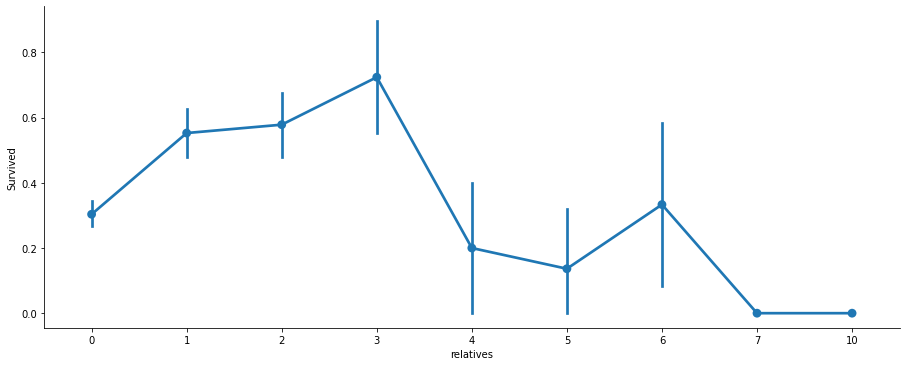

In [68]:
df['relatives'] = df['SibSp'] + df['Parch']
df.loc[df['relatives'] > 0, 'travelled_alone'] = 'No'
df.loc[df['relatives'] == 0, 'travelled_alone'] = 'Yes'
sns.catplot(x="relatives", y="Survived", data=df, kind='point', aspect=2.5)

In [71]:
from sklearn.ensemble import RandomForestClassifier

y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(df[features])

test = pd.read_csv('./test.csv')
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)

pred_dict = dict()
pred_dict['PassengerId'] = test['PassengerId']
pred_dict['Survived'] = predictions
res = pd.DataFrame(pred_dict)
res.to_csv('Submission.csv', index=False)